In [ ]:
#Student Names and ID: Jiachen Liu (1010182204)
#Instructor Name: Professor Shion Guha
#Course Code: INF2178
#Course Name: Experimental Design for Data Science
#Program: Master of Information
#Faculty: Faculty of Information
#School: University of Toronto

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
#load packages needed for analyzing this dataset
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import patsy
from scipy.stats import levene
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2

In [3]:
#read the "data" tab of the data excel into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/inf2178/A3/INF2178_A3_data.csv')

#print the number of datapoints in this DataFrame
print("Number of datapoints:", len(data))

#display the first few rows of the DataFrame
data.head()

Number of datapoints: 11933


,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [4]:
#display the basic information of the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


**From the data information displayed above, we can tell that this dataset does not have any null values but the datatype for the column "incomegroup" is integer, which should be a categorical variable for later analysis, so next step I will convert the datatype for this column.**

In [5]:
#convert incomegroup column's datatype
data["incomegroup"] = data["incomegroup"].astype("category")

**I also want to add two new columns to see the score differences for maths and spring.**

In [9]:
#calculate the change in scores from fall to spring
data["delta_readingscore"] = data["springreadingscore"] - data["fallreadingscore"]
data["delta_mathscore"] = data["springmathscore"] - data["fallmathscore"]

**So before conducting any in-depth analysis on this dataset, it's important to look at the EDAs to observe the dataset.**



In [10]:
#First, I want to see the summary statistics for each column
data.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,delta_readingscore,delta_mathscore
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,11.556963,10.671218
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,8.085004,6.855263
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,-44.760000,-22.160000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,6.470000,6.010000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,10.400000,9.860000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,15.150000,14.330000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,91.940000,75.350000


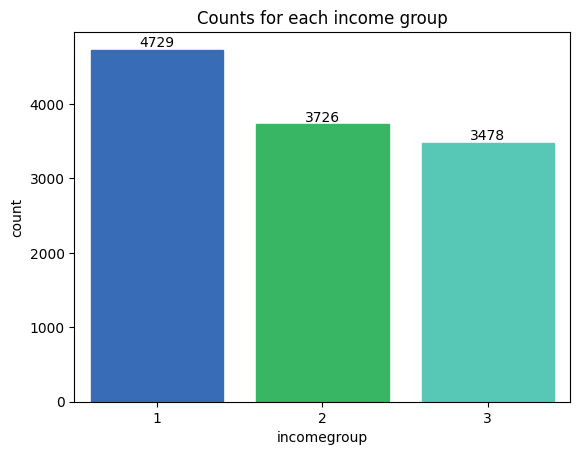

In [11]:
#It's also important to check the counts for each income group.

colors = ["#386CB6", "#38B664", "#56C8B5"] #custom colors for each bar
countplot = sns.countplot(x="incomegroup", data=data, legend=False)
for bar, color in zip(countplot.patches, colors):
  bar.set_color(color) # Manually set colors for each bar
plt.title("Counts for each income group")

#add counts above the bars using bar_label
for container in countplot.containers:
  countplot.bar_label(container)

plt.show()

<ipython-input-12-f3d70d5adbc9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "incomegroup", y = score, data = data, palette = colors)


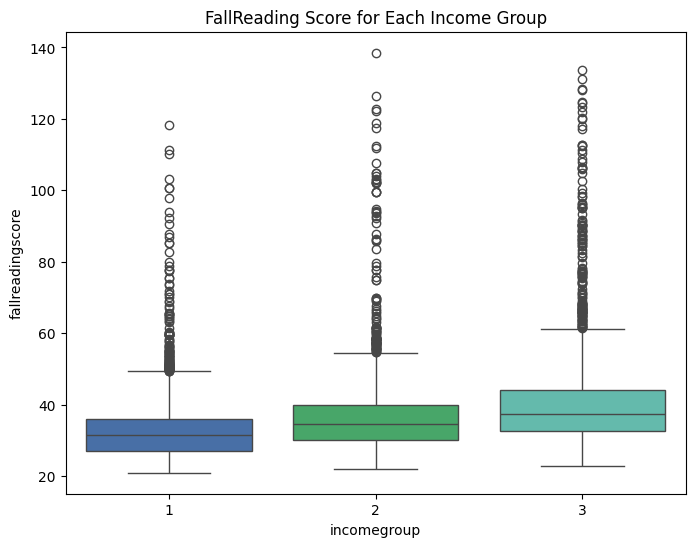

<ipython-input-12-f3d70d5adbc9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "incomegroup", y = score, data = data, palette = colors)


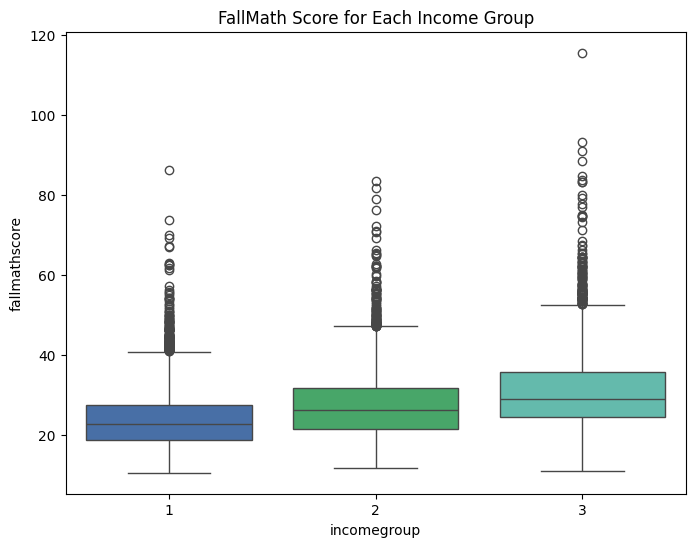

<ipython-input-12-f3d70d5adbc9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "incomegroup", y = score, data = data, palette = colors)


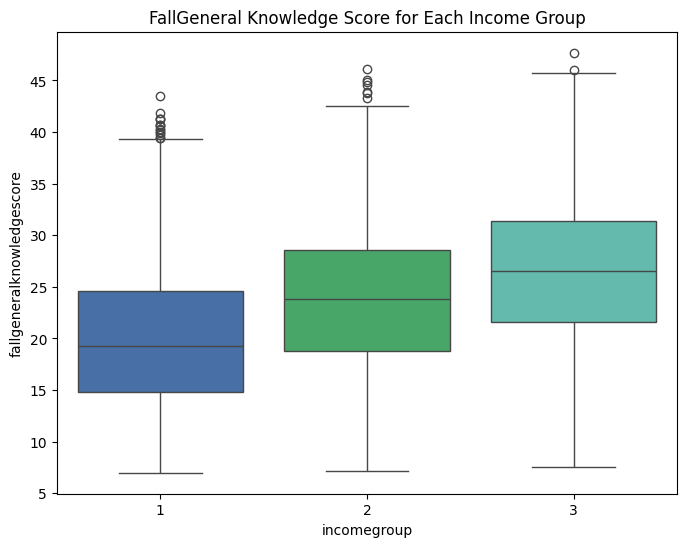

<ipython-input-12-f3d70d5adbc9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "incomegroup", y = score, data = data, palette = colors)


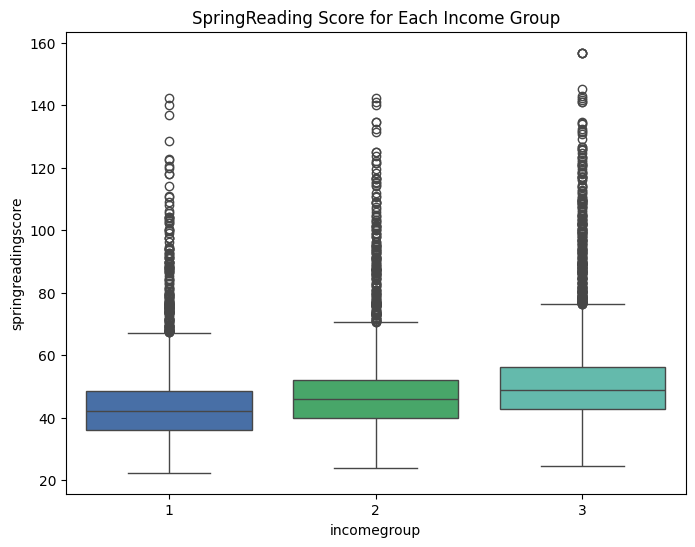

<ipython-input-12-f3d70d5adbc9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "incomegroup", y = score, data = data, palette = colors)


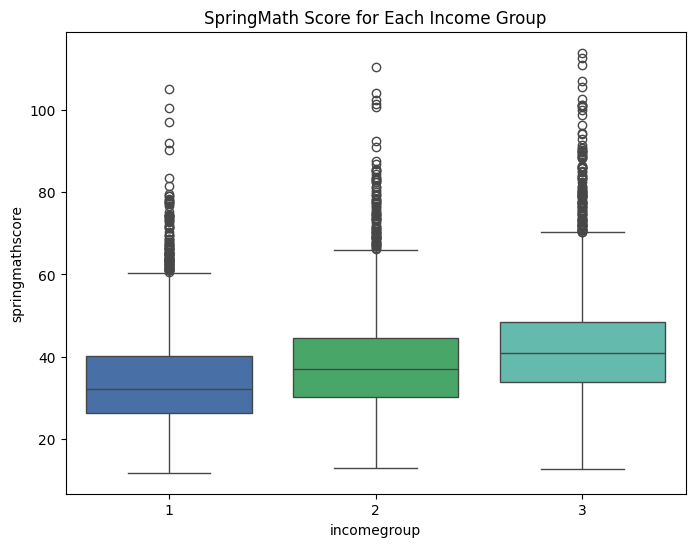

<ipython-input-12-f3d70d5adbc9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "incomegroup", y = score, data = data, palette = colors)


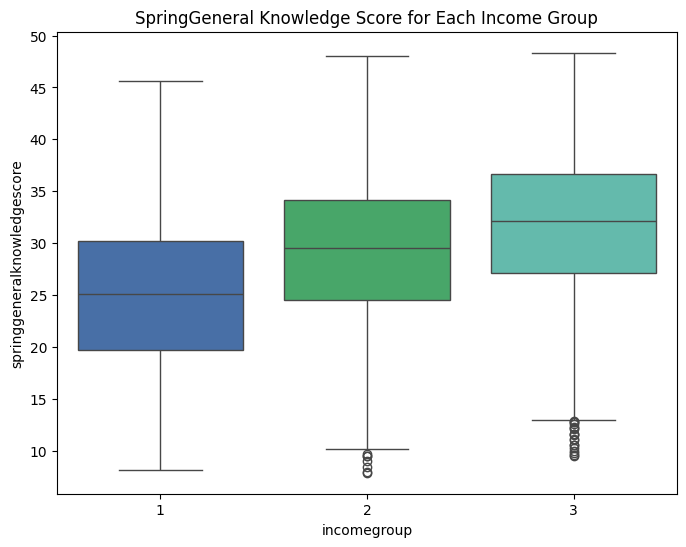

In [12]:
#Then, I want to see how for each type of score, it's spreaded out for the three income groups.
score_columns = ["fallreadingscore", "fallmathscore", "fallgeneralknowledgescore",
                 "springreadingscore", "springmathscore", "springgeneralknowledgescore"]
colors = ["#386CB6", "#38B664", "#56C8B5"] #custom colors for each income group

#create the boxplots
for score in score_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x= "incomegroup", y = score, data = data, palette = colors)
  #set titles
  title = score.capitalize().replace("fall", "Fall ").replace("spring", "Spring ").replace("score", "Score ").replace("math", "Math ").replace("reading", "Reading ").replace("generalknowledge", "General Knowledge ")
  plt.title(f"{title}for Each Income Group")
  plt.show()

<ipython-input-15-22a1e78ced47>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "incomegroup", y = "delta_readingscore", data=data, palette = colors)


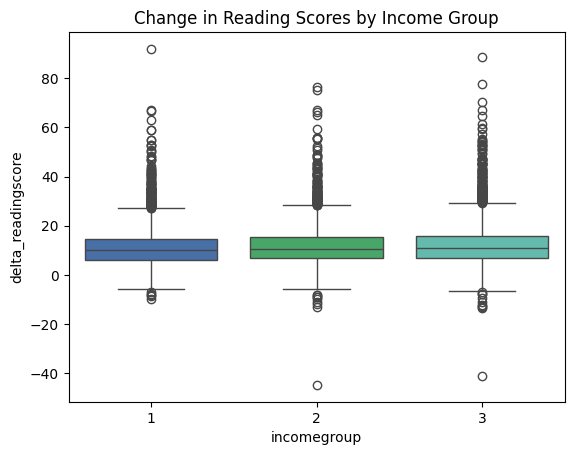

<ipython-input-15-22a1e78ced47>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "incomegroup", y = "delta_mathscore", data = data, palette = colors)


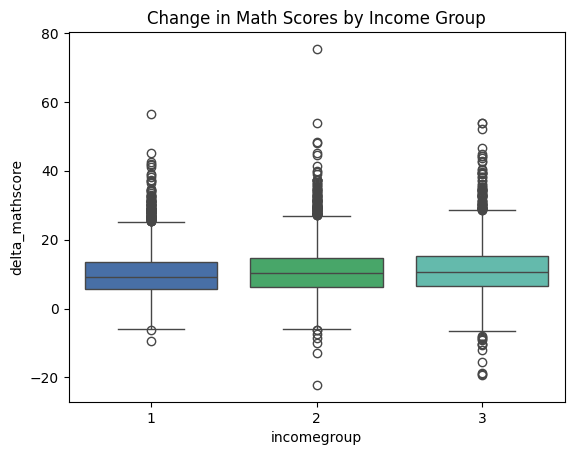

In [15]:
#Lastly, I want to see changes in reading and math scores by income group using boxplots.
colors = ["#386CB6", "#38B664", "#56C8B5"] #custom colors for each income group
sns.boxplot(x = "incomegroup", y = "delta_readingscore", data=data, palette = colors)
plt.title("Change in Reading Scores by Income Group")
plt.show()

sns.boxplot(x = "incomegroup", y = "delta_mathscore", data = data, palette = colors)
plt.title("Change in Math Scores by Income Group")
plt.show()

**After observing the EDAs, my research question would be, how does income group affect the changes in kindergarten students' reading and math scores over an academic year, after controlling for their general knowledge scores?**

For each subject, I will conduct a one-way ANCOVA analysis.

For ANCOVA analysis, there are four assumptions needed to be checked.

Assumption 1: Homogeneity of Variances

Assumption 2: Homogeneity of Regression Slopes

Assumption 3: Linearity

Assumption 4: Normality of Residuals

Now, I will check these assumptions one by one.

**Reading Scores**

Null Hypothesis (H0): There is no difference in the change in reading scores from fall to spring among the different income groups after controlling for the general knowledge score.

Alternative Hypothesis (H1): There is a difference in the change in reading scores from fall to spring among the different income groups after controlling for the general knowledge score.

In [48]:
#fit an OLS model
model_reading = ols("delta_readingscore ~ C(incomegroup) + springgeneralknowledgescore", data=data).fit()
print(model_reading.summary())

                            OLS Regression Results                            
Dep. Variable:     delta_readingscore   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sat, 23 Mar 2024   Prob (F-statistic):          8.22e-119
Time:                        06:53:23   Log-Likelihood:                -41597.
No. Observations:               11933   AIC:                         8.320e+04
Df Residuals:                   11929   BIC:                         8.323e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [32]:
#Assumption 1 - Homegeneity of Variances
#Levene's test could be used to check for equal variances across groups defined by the categorical independent variable.

levene_stat, levene_p = levene(data["delta_readingscore"][data["incomegroup"] == 1],
                               data["delta_readingscore"][data["incomegroup"] == 2],
                               data["delta_readingscore"][data["incomegroup"] == 3])

print(f"Levene's Test Statistic: {levene_stat}, p-value: {levene_p}")

Levene's Test Statistic: 19.7280103692154, p-value: 2.794929503613517e-09


In [34]:
#Assumption 2 - Homogeneity of Regression Slopes
#For this, I include an interaction term in the model and check its significance.
model_interaction = ols("delta_readingscore ~ C(incomegroup) * springgeneralknowledgescore", data=data).fit()
anova_interaction = sm.stats.anova_lm(model_interaction, typ=2)

anova_interaction

,sum_sq,df,F,PR(>F)
C(incomegroup),15.563773,2.0,0.124728,8.827378e-01
springgeneralknowledgescore,30884.839053,1.0,495.023487,1.739587e-107
C(incomegroup):springgeneralknowledgescore,706.993371,2.0,5.665860,3.471496e-03
Residual,744133.328653,11927.0,NaN,NaN


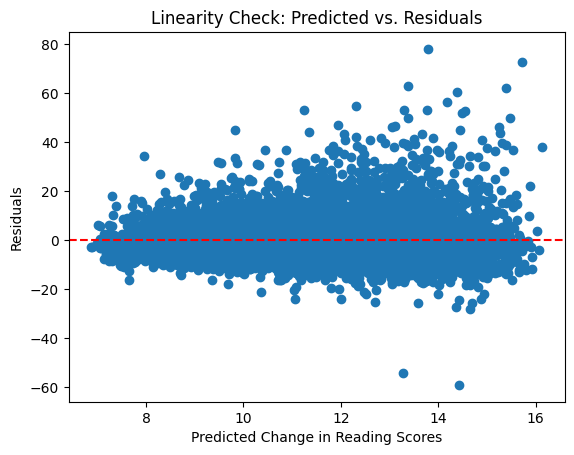

In [35]:
#Assumption 3 - Linearity
#This is best checked visually, comparing predicted values against residuals.
#for a basic check, plot the observed vs. predicted values
plt.scatter(model_reading.fittedvalues, model_reading.resid)
plt.axhline(0, color="red", linestyle='--')
plt.xlabel("Predicted Change in Reading Scores")
plt.ylabel("Residuals")
plt.title("Linearity Check: Predicted vs. Residuals")
plt.show()

In [36]:
#Assumption 4 - Normality of Residuals
#Conduct a Shapiro-Wilk Test on model residuals
shapiro_stat, shapiro_p = shapiro(model_reading.resid)

print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}")

Shapiro-Wilk Test Statistic: 0.9017348289489746, p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [47]:
# ANCOVA analysis
model = ols('delta_readingscore ~ C(incomegroup) + springgeneralknowledgescore', data=data).fit()
anova_results_reading = sm.stats.anova_lm(model, typ=2)

print(anova_results_reading)

                                    sum_sq       df           F         PR(>F)
C(incomegroup)                   15.563773      2.0    0.124631   8.828238e-01
springgeneralknowledgescore   30884.839053      1.0  494.636547  2.093771e-107
Residual                     744840.322024  11929.0         NaN            NaN


**Math Scores**

Null Hypothesis (H0): There is no difference in the change in maths scores from fall to spring among the different income groups after controlling for the general knowledge score.

Alternative Hypothesis (H1): There is a difference in the change in maths scores from fall to spring among the different income groups after controlling for the general knowledge score.

This involves same steps as the reading scores.

In [49]:
#fit an OLS model for math score improvement
model_math = ols("delta_mathscore ~ C(incomegroup) + springgeneralknowledgescore", data=data).fit()
print(model_math.summary())

                            OLS Regression Results                            
Dep. Variable:        delta_mathscore   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     371.9
Date:                Sat, 23 Mar 2024   Prob (F-statistic):          6.07e-231
Time:                        07:22:38   Log-Likelihood:                -39369.
No. Observations:               11933   AIC:                         7.875e+04
Df Residuals:                   11929   BIC:                         7.878e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [41]:
#Assumption 1 - Homegeneity of Variances
#Levene's test could be used to check for equal variances across groups defined by the categorical independent variable.
levene_stat_math, levene_p_math = levene(data["delta_mathscore"][data["incomegroup"] == 1],
                                          data["delta_mathscore"][data["incomegroup"] == 2],
                                          data["delta_mathscore"][data["incomegroup"] == 3])

print(f"Levene's Test Statistic for Math Score Improvement: {levene_stat_math}, p-value: {levene_p_math}")

Levene's Test Statistic for Math Score Improvement: 22.215180179067378, p-value: 2.344180384098772e-10


In [42]:
#Assumption 2 - Homogeneity of Regression Slopes
#For this, I include an interaction term in the model and check its significance.
model_interaction_math = ols("delta_mathscore ~ C(incomegroup) * springgeneralknowledgescore", data=data).fit()
anova_interaction_math = sm.stats.anova_lm(model_interaction_math, typ=2)

anova_interaction_math

,sum_sq,df,F,PR(>F)
C(incomegroup),175.899911,2.0,2.046987,1.291687e-01
springgeneralknowledgescore,43530.309375,1.0,1013.144253,1.825446e-213
C(incomegroup):springgeneralknowledgescore,325.898703,2.0,3.792557,2.256507e-02
Residual,512450.224659,11927.0,NaN,NaN


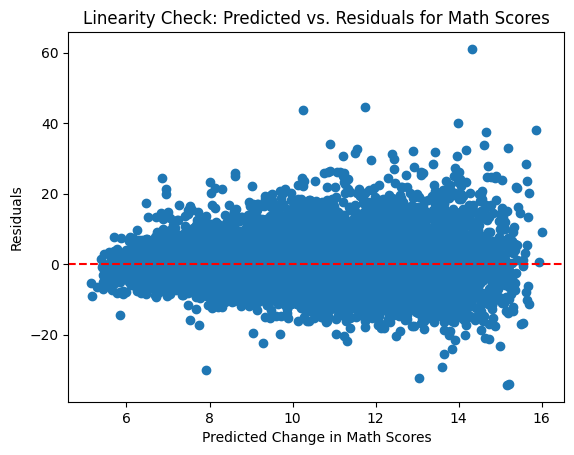

In [43]:
#Assumption 3 - Linearity
#plot observed vs. predicted values for linearity check
plt.scatter(model_math.fittedvalues, model_math.resid)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Change in Math Scores")
plt.ylabel("Residuals")
plt.title("Linearity Check: Predicted vs. Residuals for Math Scores")
plt.show()

In [44]:
#Assumption 4 - Normality of Residuals
#Conduct a Shapiro-Wilk Test on model residuals
shapiro_stat_math, shapiro_p_math = shapiro(model_math.resid)

print(f"Shapiro-Wilk Test Statistic for Math Score Improvement: {shapiro_stat_math}, p-value: {shapiro_p_math}")

Shapiro-Wilk Test Statistic for Math Score Improvement: 0.9687734246253967, p-value: 9.80908925027372e-45


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [50]:
#perform ANCOVA analysis for math score improvement
model_anova_math = ols("delta_mathscore ~ C(incomegroup) + springgeneralknowledgescore", data=data).fit()
anova_results_math = sm.stats.anova_lm(model_anova_math, typ=2)

anova_results_math

,sum_sq,df,F,PR(>F)
C(incomegroup),175.899911,2.0,2.046029,1.292924e-01
springgeneralknowledgescore,43530.309375,1.0,1012.670124,2.264398e-213
Residual,512776.123363,11929.0,NaN,NaN
